In [1]:
pip install mysql.connector


     ---------------------------------------- 0.0/11.9 MB ? eta -:--:--
     ---------------------------------------- 0.0/11.9 MB ? eta -:--:--
      --------------------------------------- 0.3/11.9 MB ? eta -:--:--
     -- ------------------------------------- 0.8/11.9 MB 1.8 MB/s eta 0:00:07
     ---- ----------------------------------- 1.3/11.9 MB 1.9 MB/s eta 0:00:06
     ---- ----------------------------------- 1.3/11.9 MB 1.9 MB/s eta 0:00:06
     ---- ----------------------------------- 1.3/11.9 MB 1.9 MB/s eta 0:00:06
     ---- ----------------------------------- 1.3/11.9 MB 1.9 MB/s eta 0:00:06
     ---- ----------------------------------- 1.3/11.9 MB 1.9 MB/s eta 0:00:06
     ---- ----------------------------------- 1.3/11.9 MB 1.9 MB/s eta 0:00:06
     ---- ----------------------------------- 1.3/11.9 MB 1.9 MB/s eta 0:00:06
     ----- --------------------------------- 1.6/11.9 MB 665.7 kB/s eta 0:00:16
     ------ -------------------------------- 1.8/11.9 MB 699.0 kB/s eta

In [2]:
import pandas as pd

import matplotlib.pyplot as plt

import numpy as np

In [3]:
def make_connection_with_db():
    import mysql.connector
  
    connection_mydb = mysql.connector.connect(
        host="localhost",
        user="root",
        password="",
        database="wp-ecommerce"
    )
    cursor = connection_mydb.cursor(dictionary=True)
    return connection_mydb, cursor

In [4]:
def get_customers_by_country():
    _,cursor = make_connection_with_db()
    
    sql = '''SELECT country, count(customer_id) as count_by_country 
          FROM  wp_wc_customer_lookup 
          group by country'''
    
    cursor.execute(sql)
    
    customers_results = cursor.fetchall()
    
    df = pd.DataFrame(columns=['country','count_by_country'])
    
    for customer in customers_results:
        obj = {
                "country":[customer['country']],
                "count_by_country":[customer['count_by_country']]
        }
        df_obj = pd.DataFrame(obj)
        df = pd.concat([df, df_obj], ignore_index=True)
    return df

In [5]:
df_customers_countries = get_customers_by_country()

df_customers_countries

,country,count_by_country
0,AE,209
1,BH,218
2,JO,187
3,KW,188
4,SA,179


In [6]:
def show_customers_by_countries_bars():
    df_customers_countries=get_customers_by_country()
    
    x = df_customers_countries['country']
    
    y = df_customers_countries['count_by_country']
    
    plt.xlabel("Country")
    plt.ylabel("Count")
    
    plt.title('Coustomers per Countries')
    colors=[]
    
    for i in range(len(x)):
        
        colors.append([np.random.rand(),np.random.rand(),np.random.rand()])
        
        plt.text(x=i, y=y[i], s=y[i])
    
    plt.bar(x,y, color=colors)
    
    plt.show()

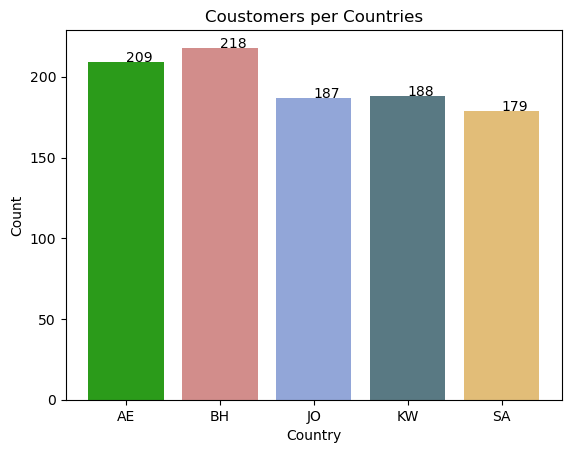

In [7]:
show_customers_by_countries_bars()

In [8]:
def show_customers_by_countries_pie():
    
    df_customers_countries = get_customers_by_country()
    
    plt.pie(df_customers_countries['count_by_country'], 
            labels = df_customers_countries['country'], 
            autopct='%1.1f%%')
    
    plt.title('Coustomers per Countries')
    plt.show()

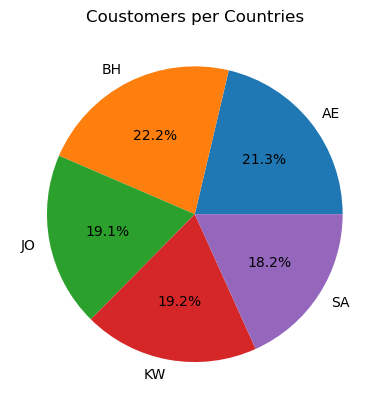

In [9]:
show_customers_by_countries_pie()